In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data_file = open("F:\mnist_dataset\mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [3]:
test_data_file = open("F:\mnist_dataset\mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

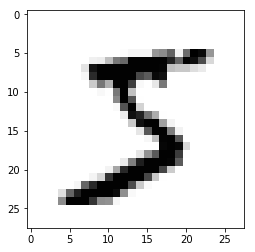

In [5]:
all_values = training_data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation = 'None')

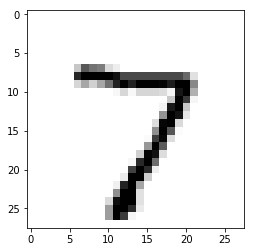

In [6]:
all_values = test_data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation = 'None')

In [7]:
#Neural Network class definition
class NeuralNetwork:
    #Initialize the neural network
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        #Initialize the number input nodes, hidden nodes, output nodes and learning rate
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes
        
        #Initaializing the weights of the neural network
        #Weights of the connections between the input layer and the hidden layer 
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        
        #Weights of the connections between the hidden layer and output layer
        self.who = np.random.normal(0.0 , pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        #Learning rate 
        self.lr = learningRate
        
        #Activation function
        self.activation_fn = lambda x : scipy.special.expit(x)
    
    #Train the neural network
    def train(self, input_list, target_list):
        #Convert inputs into 2d array
        inputs = np.array(input_list, ndmin = 2).T
        targets = np.array(target_list, ndmin = 2).T
        
        #Calculating the inputs to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        #Calculating the output of the hidden layer
        hidden_outputs = self.activation_fn(hidden_inputs)
        
        #Calcualting the inputs to the final layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        #Calculating the outputs of the final layer 
        final_outputs = self.activation_fn(final_inputs)
        
        #Error of the final layer
        output_errors = targets - final_outputs
        
        #Hidden layer errors is the final layer errors split by the weights
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #Updating the weights
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

    #Query the neural network
    def query(self, input_list):
        inputs = np.array(input_list, ndmin = 2).T
        
        #Calculating the inputs to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        
        #Calculating the output of the hidden layer
        hidden_outputs = self.activation_fn(hidden_inputs)
        
        #Calcualting the inputs to the final layer
        final_inputs = np.dot(self.who, hidden_outputs)
        
        #Calculating the outputs of the final layer 
        final_outputs = self.activation_fn(final_inputs)
        
        return final_outputs
        
    

In [8]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

lr = 0.1

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)

In [9]:
epochs = 5

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        nn.train(inputs, targets)

In [12]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    outputs = nn.query(inputs)
    label = np.argmax(outputs)
    if correct_label == label:
        scorecard.append(1)
    else:
        scorecard.append(0)

In [13]:
print("performance = ", sum(scorecard) / len(scorecard))

performance =  0.9746
